In [1]:
from dataloader import load_data_label_encoded
from trainer import train_model, evaluate_model
from snn import SNNModelSimple
import torch
import matplotlib.pyplot as plt
import pickle

In [3]:
root_folder = "./"
file_name = "final_merged_df_sw500.csv"

train_losses_bs = {}
train_accuracies_bs = {}
val_losses_bs = {}
val_accuracies_bs = {}
test_accuracies_bs = {}
for bs in [32, 64, 128]:
    print(f"Training for batch_size={bs}")
    train_loader, val_loader, test_loader, num_outputs, num_features = load_data_label_encoded(root_folder, file_name, num_steps=100, batch_size=bs)

    model = SNNModelSimple(num_features, num_outputs, beta=0.99)
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

    train_losses, train_accuracies, val_losses, val_accuracies = train_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=10)
    train_losses_bs[bs] = train_losses
    train_accuracies_bs[bs] = train_accuracies
    val_losses_bs[bs] = val_losses
    val_accuracies_bs[bs] = val_accuracies

    test_accuracies_bs[bs] = evaluate_model(model, test_loader)

out_file_name = 'exp6_beta_09_bs_32_128_ep_10_T_300.pkl' 
with open(out_file_name, 'wb') as f:
    pickle.dump({"train_losses": train_losses_bs, "train_accuracies": train_accuracies_bs, "val_losses": val_losses_bs, "val_accuracies": val_accuracies_bs, "test_accuracies": test_accuracies_bs}, f)


Training for batch_size=32
Epoch 1/10, Train Loss: 1.8611, Train Accuracy: 31.89%, Val Loss: 1.6000, Val Accuracy: 38.20%, Time: 142.60s
Epoch 2/10, Train Loss: 1.6030, Train Accuracy: 38.22%, Val Loss: 1.5927, Val Accuracy: 37.94%, Time: 141.46s
Epoch 3/10, Train Loss: 1.5704, Train Accuracy: 39.65%, Val Loss: 1.5736, Val Accuracy: 40.58%, Time: 141.36s
Epoch 4/10, Train Loss: 1.5456, Train Accuracy: 40.46%, Val Loss: 1.5610, Val Accuracy: 39.55%, Time: 142.28s
Epoch 5/10, Train Loss: 1.5387, Train Accuracy: 40.46%, Val Loss: 1.5394, Val Accuracy: 40.10%, Time: 147.66s
Epoch 6/10, Train Loss: 1.5272, Train Accuracy: 40.74%, Val Loss: 1.5628, Val Accuracy: 41.28%, Time: 141.57s
Epoch 7/10, Train Loss: 1.5198, Train Accuracy: 40.98%, Val Loss: 1.5468, Val Accuracy: 40.04%, Time: 140.95s
Epoch 8/10, Train Loss: 1.5168, Train Accuracy: 41.31%, Val Loss: 1.5237, Val Accuracy: 40.95%, Time: 140.54s
Epoch 9/10, Train Loss: 1.5071, Train Accuracy: 41.63%, Val Loss: 1.5136, Val Accuracy: 41.48

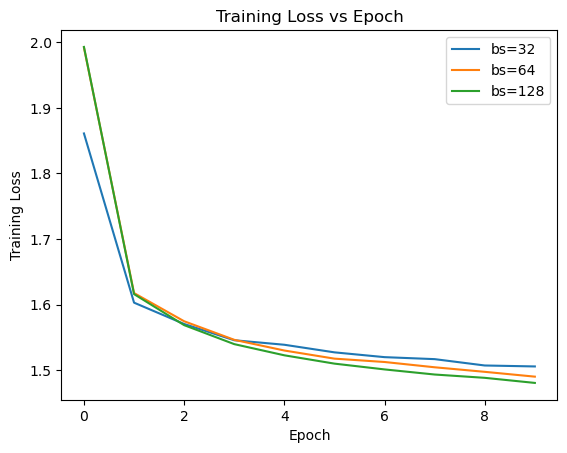

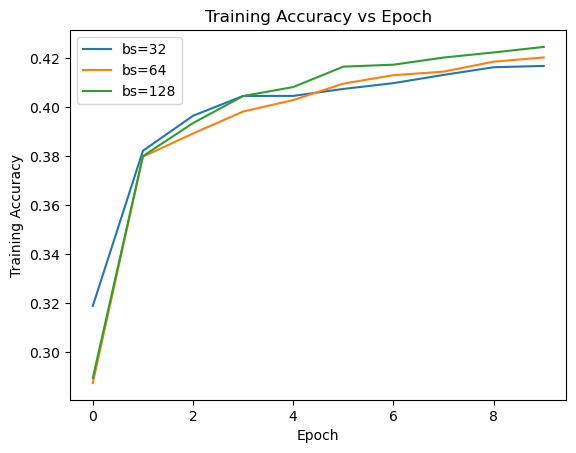

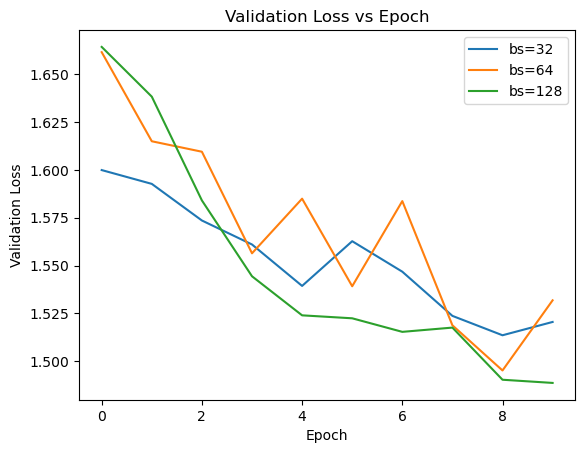

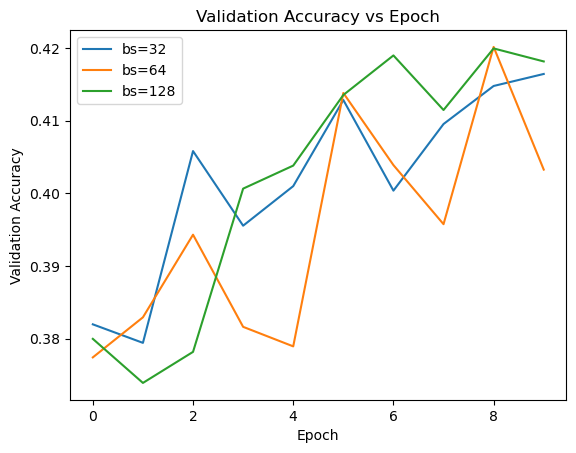

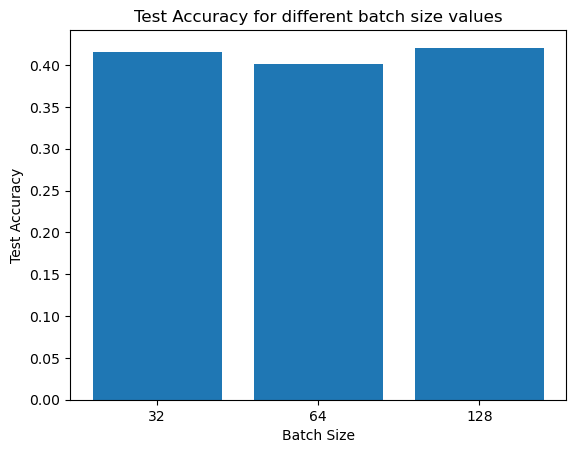

In [5]:
batch_size = [32, 64, 128]

plt.figure()
for bs in batch_size:
    plt.plot(train_losses_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch") 
    plt.ylabel("Training Loss")
    plt.legend()
    plt.title("Training Loss vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(train_accuracies_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.legend()
    plt.title("Training Accuracy vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(val_losses_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Loss")
    plt.legend()
    plt.title("Validation Loss vs Epoch")

plt.figure()
for bs in batch_size:
    plt.plot(val_accuracies_bs[bs], label=f"bs={bs}")
    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.legend()
    plt.title("Validation Accuracy vs Epoch")

plt.figure()
plt.bar([str(bs) for bs in batch_size], [test_accuracies_bs[bs] for bs in batch_size])
plt.xlabel("Batch Size")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for different batch size values")
plt.show()